In [1]:
%matplotlib inline
import numpy as np
import torch

import sys 
sys.path.insert(0,'..')
from utils.dataset import HandwritingDataset
from utils import plot_stroke
from utils.data_utils import data_denormalization
from utils.constants import Global

..\utils\__init__.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://matplotlib_inline.backend_inline' by the following code:
  File "C:\Users\hladi\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hladi\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "c:\Users\hladi\Desktop\Handwriting-synthesis3\env\lib\site-packages\i

In [2]:
data_path = '../data/'
traindata = HandwritingDataset(data_path, split='train', text_req=False, debug=False)
validdata = HandwritingDataset(data_path, split='valid', text_req=False, debug=False)

In [3]:
print('Size of train dataset: {}'.format(len(traindata)))
print('Size of valid dataset: {}'.format(len(validdata)))

Size of train dataset: 5400
Size of valid dataset: 600


In [5]:
print('Shape of train dataset: {}'.format(traindata.dataset.shape))

Shape of train dataset: (5400, 1191, 3)


In [23]:
idx = 10
input_seq, target, mask = traindata[idx]
print(input_seq.shape)
print(input_seq.device)

torch.Size([1191, 3])
cpu


Normalized data


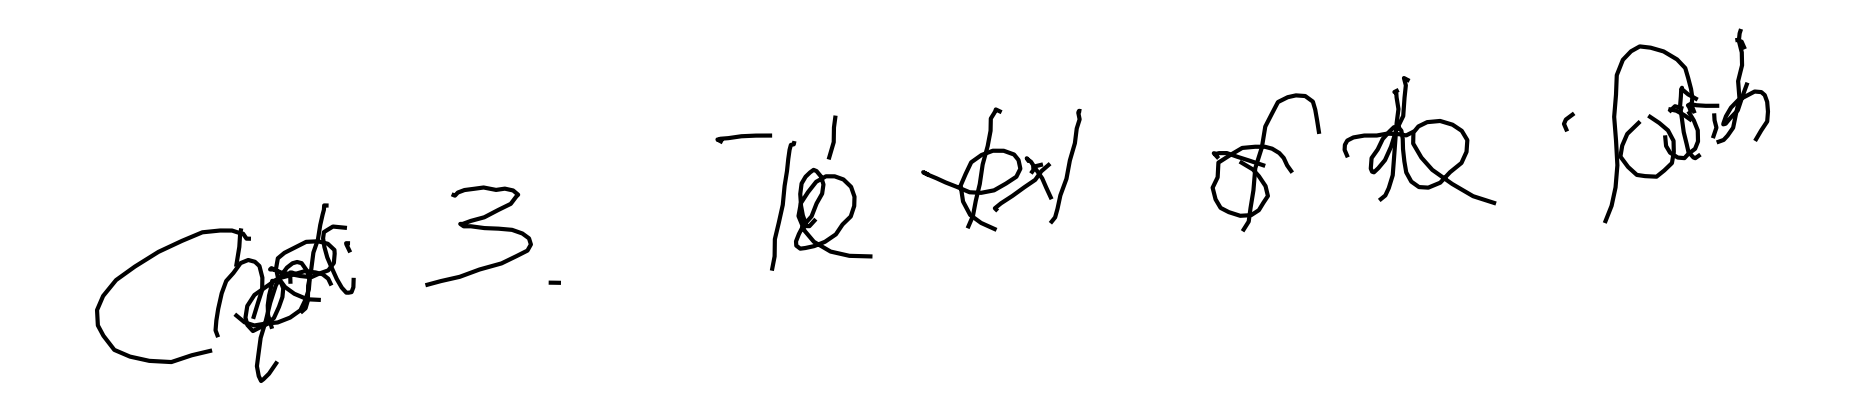

In [24]:
print('Normalized data')
plot_stroke(input_seq.numpy())
# print(input_seq)

(1, 1191, 3)
Train mean: [ 0.22309983 -0.00335341] 
 Train std: [1.5284463 1.35928  ]
Denormalized data


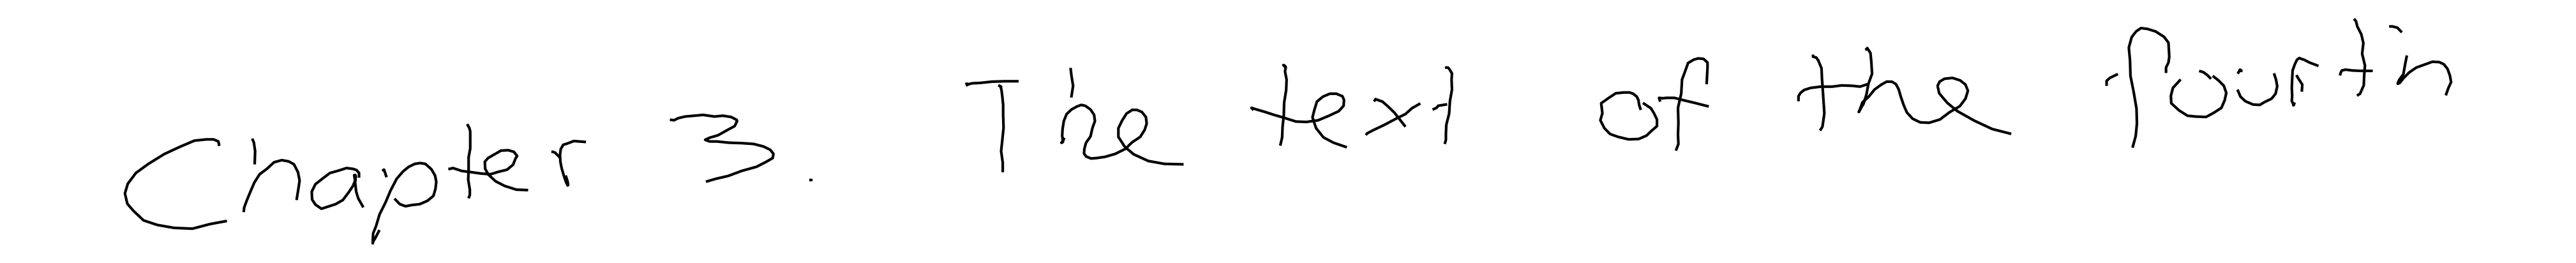

In [25]:
stroke = input_seq.unsqueeze(0).numpy()
print(stroke.shape)
print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))
denor_stroke_seq = data_denormalization(Global.train_mean, Global.train_std, stroke)
print('Denormalized data')
# print(denor_stroke_seq)
plot_stroke(denor_stroke_seq[0])

In [26]:
_traindata = HandwritingDataset(data_path, split='train', text_req=True, debug=False)
_validdata = HandwritingDataset(data_path, split='valid', text_req=True, debug=False)

In [27]:
print('Size of train dataset: {}'.format(len(_traindata)))
print('Size of valid dataset: {}'.format(len(_validdata)))

Size of train dataset: 5400
Size of valid dataset: 600


In [28]:
print('Shape of train dataset: {}'.format(_traindata.dataset.shape))

Shape of train dataset: (5400, 1191, 3)


In [30]:
idx = 20
input_seq, target, mask, text, char_mask = _traindata[idx]
print(input_seq.shape)
text_seq = _traindata.idx_to_char(text.long().numpy())
text_str = ''.join(text_seq)

print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))

torch.Size([1191, 3])
Train mean: [ 0.2232614  -0.00317592] 
 Train std: [1.5315456 1.3598886]


Normalized data
Text:  trail, the ground rose again to a ridge.                        


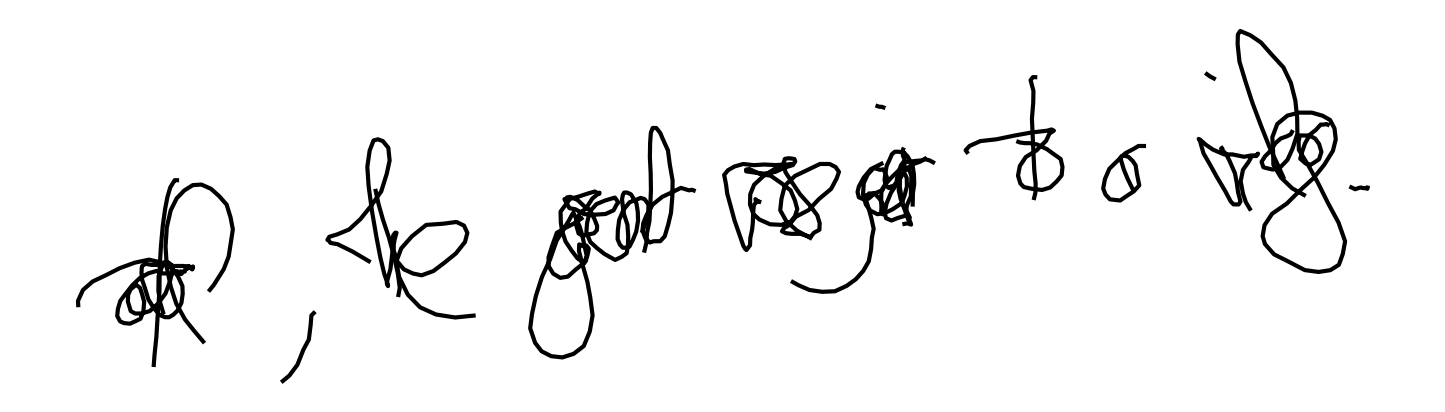

In [33]:
print('Normalized data')
print("Text: ", text_str)
plot_stroke(input_seq.numpy())
# print(input_seq)

(1, 1191, 3)
Train mean: [ 0.2232614  -0.00317592] 
 Train std: [1.5315456 1.3598886]
Denormalized data


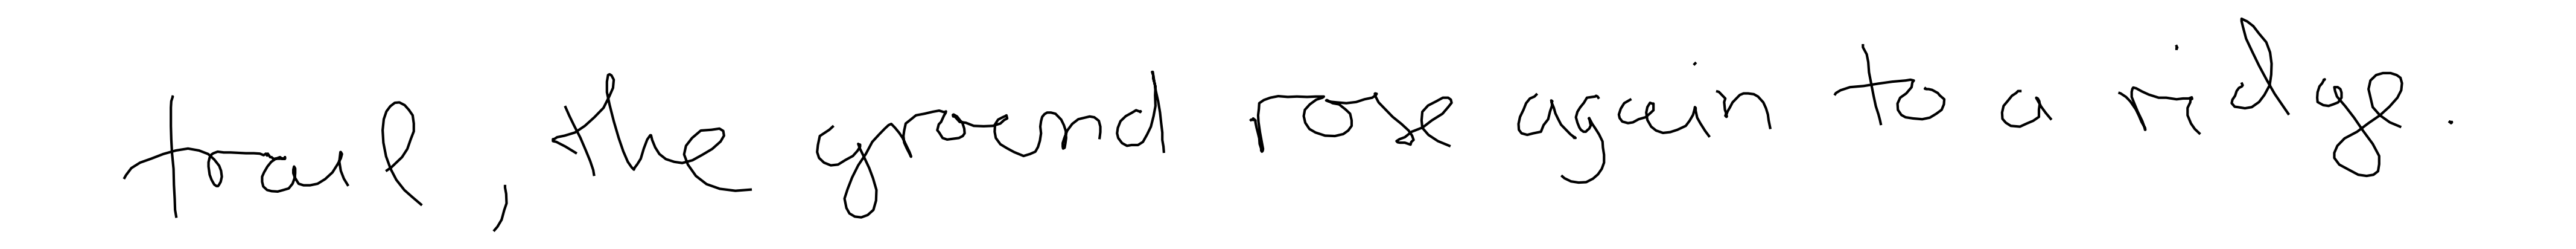

In [34]:
stroke = input_seq.unsqueeze(0).numpy()
print(stroke.shape)
print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))
denor_stroke_seq = data_denormalization(Global.train_mean, Global.train_std, stroke)
print('Denormalized data')
# print(denor_stroke_seq)
plot_stroke(denor_stroke_seq[0])

In [35]:
mean = denor_stroke_seq[:, :, 1:].mean(axis=(0, 1))
denor_stroke_seq[:, :, 1:] -= mean
std = denor_stroke_seq[:, :, 1:].std(axis=(0, 1))
denor_stroke_seq[:, :, 1:] /= std
print(denor_stroke_seq[:, :, 1:].mean(axis=(0, 1)), denor_stroke_seq[:, :, 1:].std(axis=(0, 1)))
# print('Normalized stroke for mean 0 and std 1 \n{}'.format(denor_stroke_seq))

[-2.1647347e-07 -5.1023341e-10] [1.0000112 1.0000004]


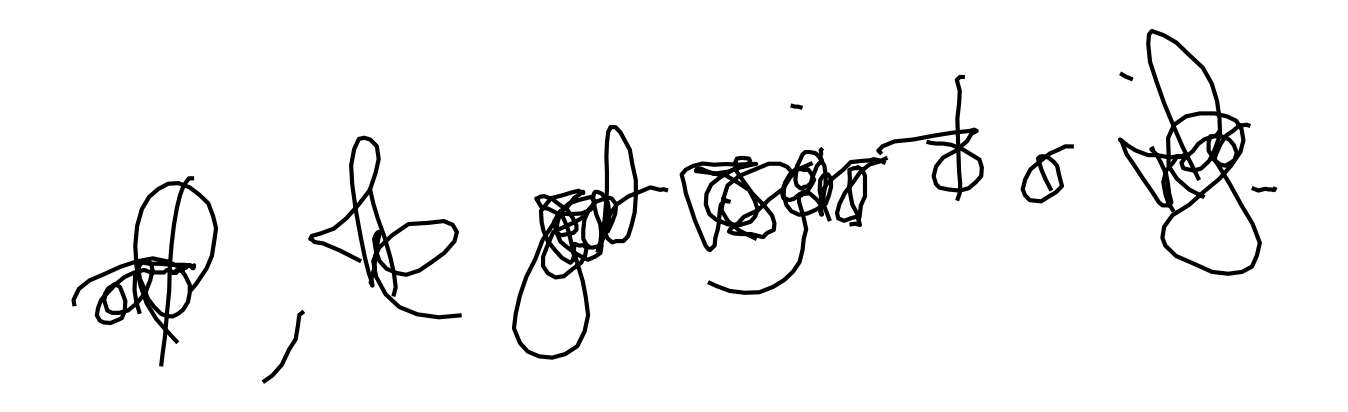

In [36]:
plot_stroke(denor_stroke_seq[0])

In [37]:
strokes = np.load(data_path + 'strokes.npy', allow_pickle=True, encoding='bytes')
with open(data_path + 'sentences.txt') as file:
    texts = file.read().splitlines()
np.savetxt("data_1.txt", strokes[0], delimiter=',', newline='\n', encoding='utf-8')

6000
[5693  773 5599 4567 2158 1114 3281 5584 5738  182]


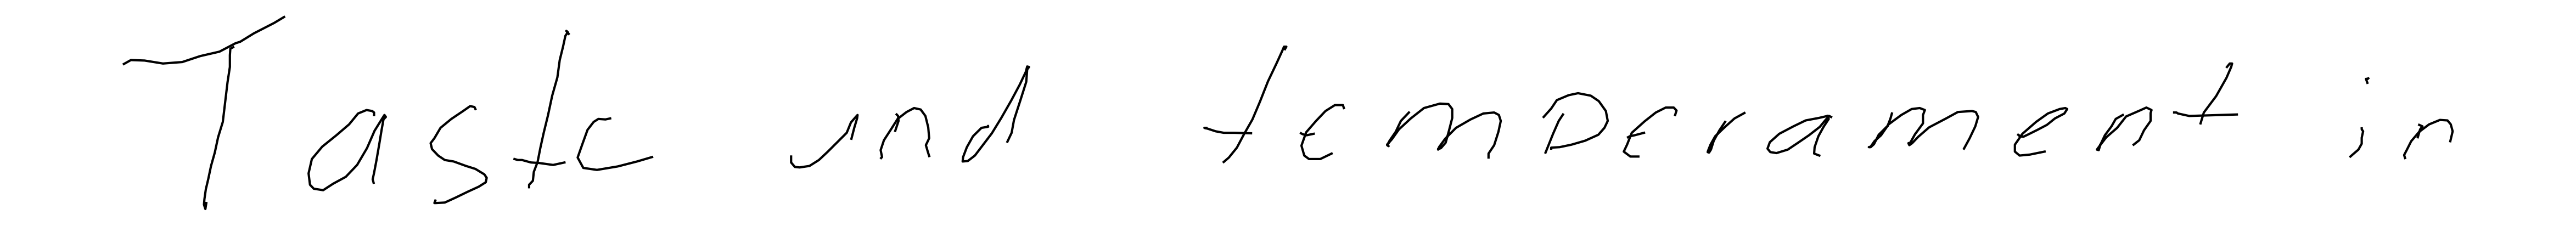

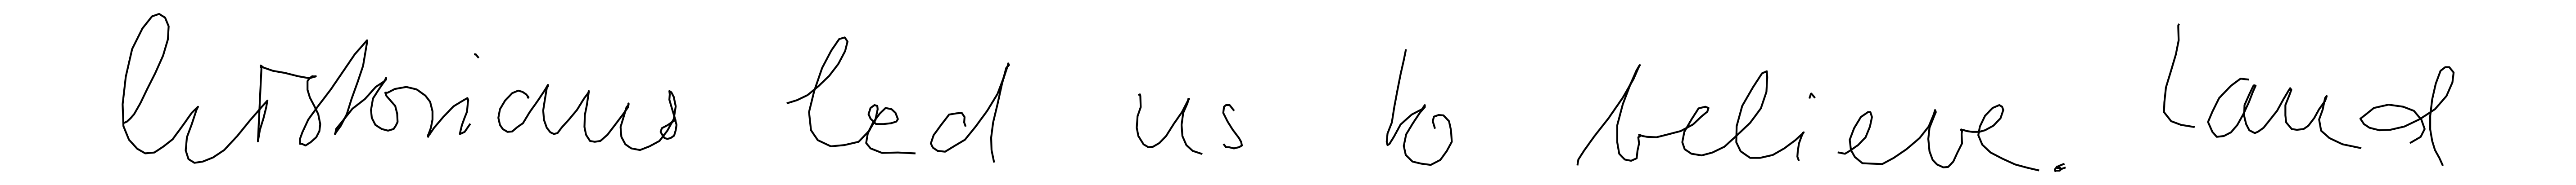

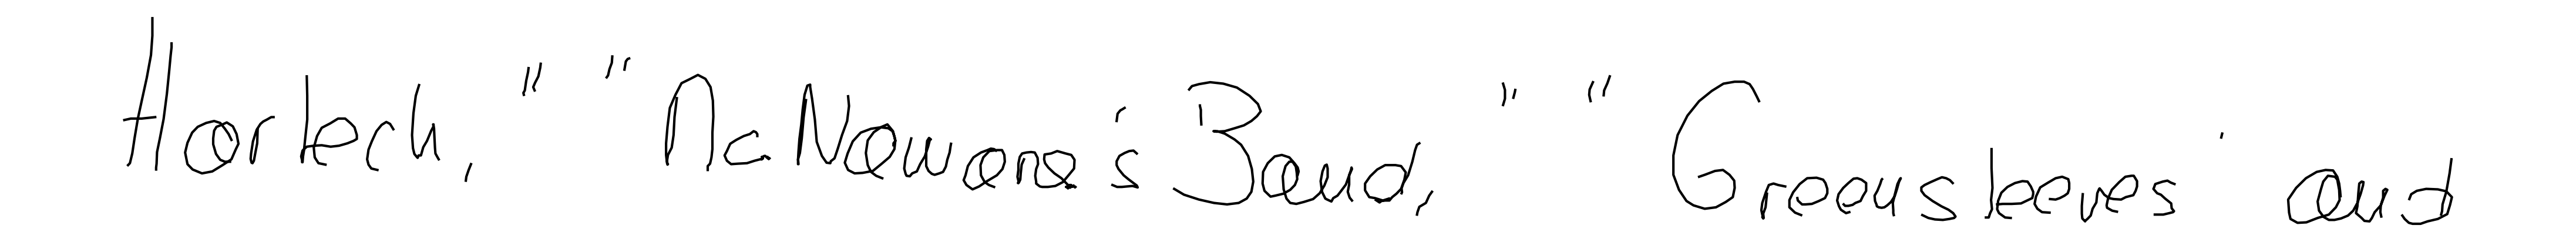

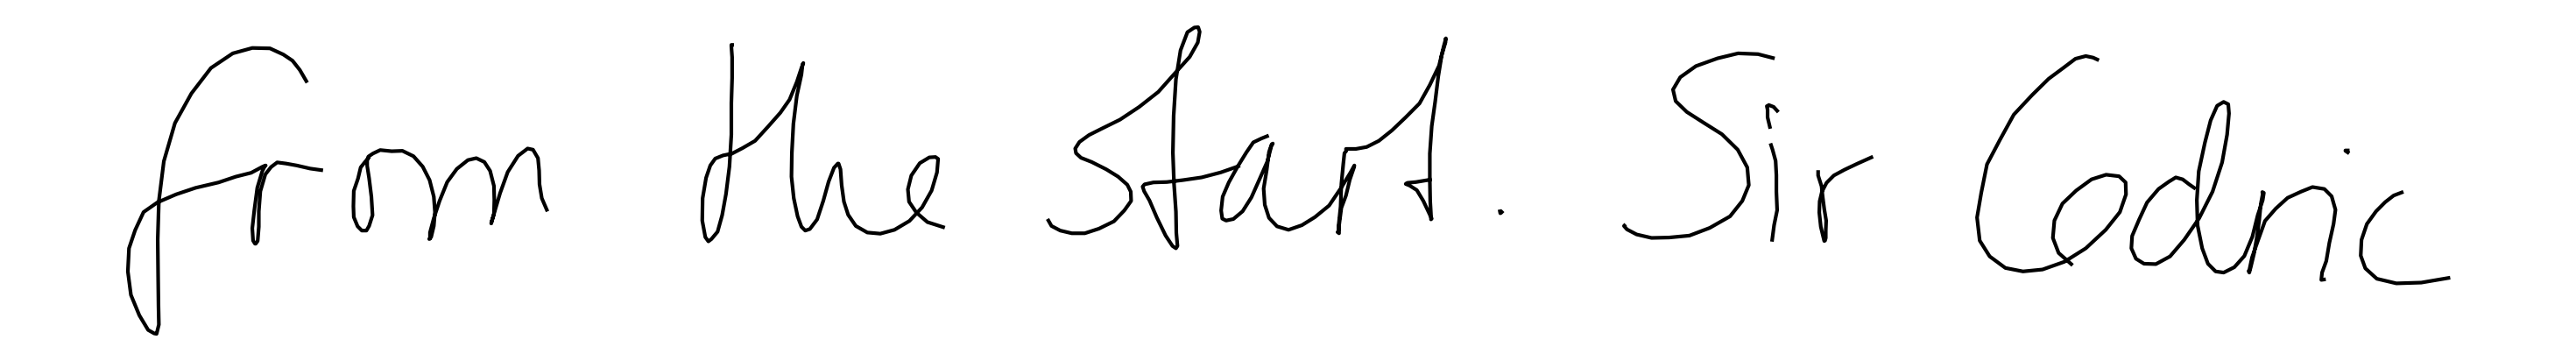

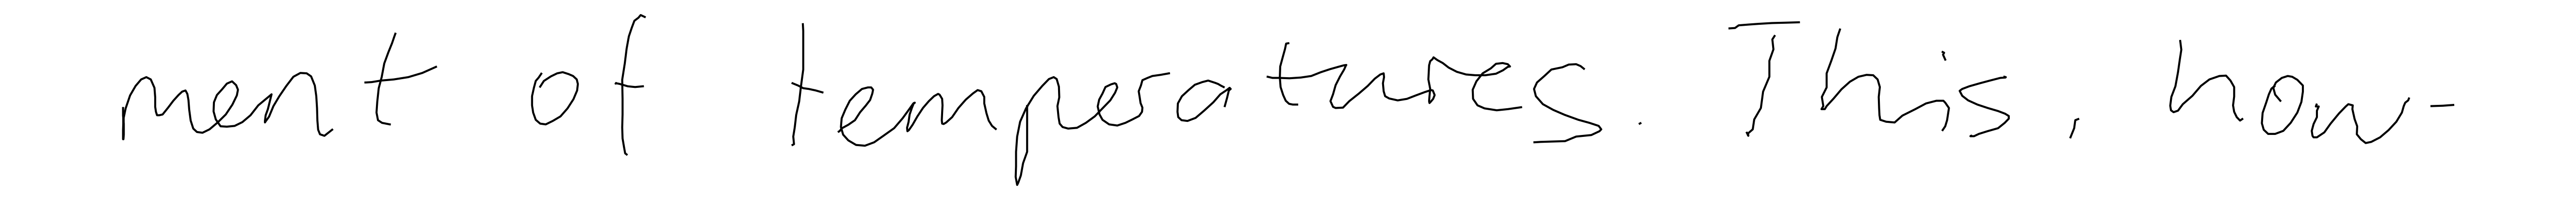

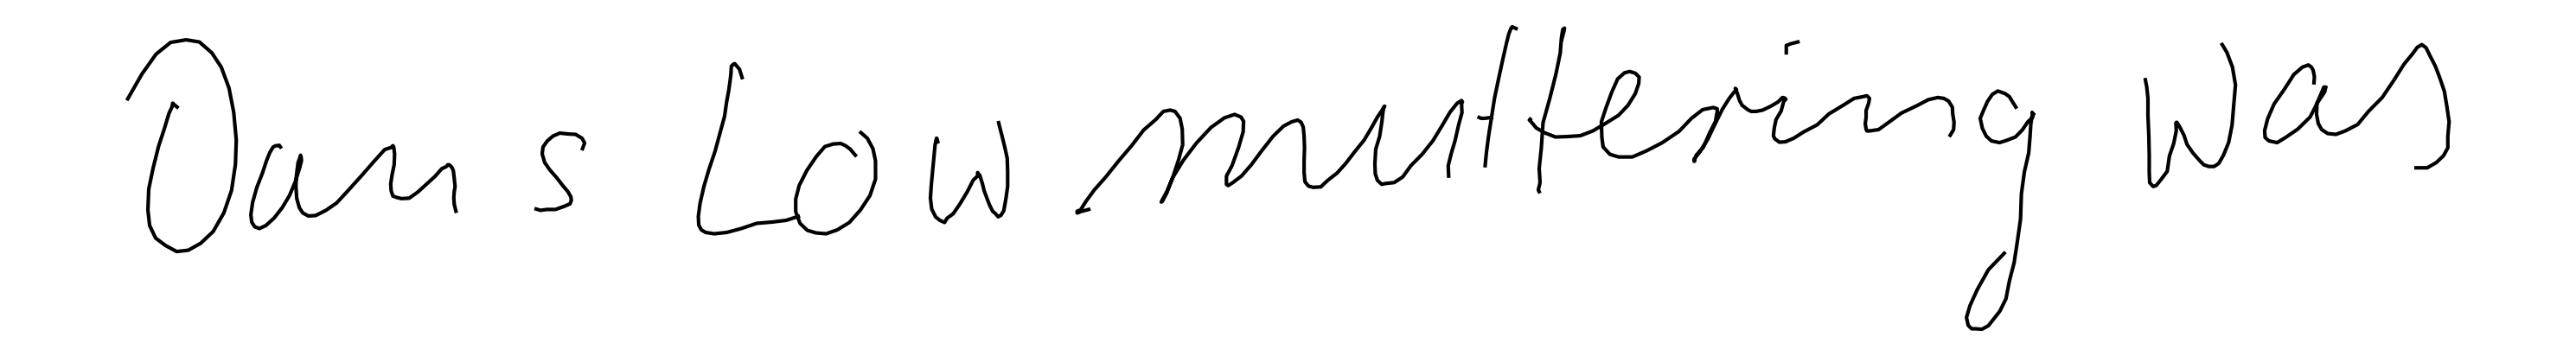

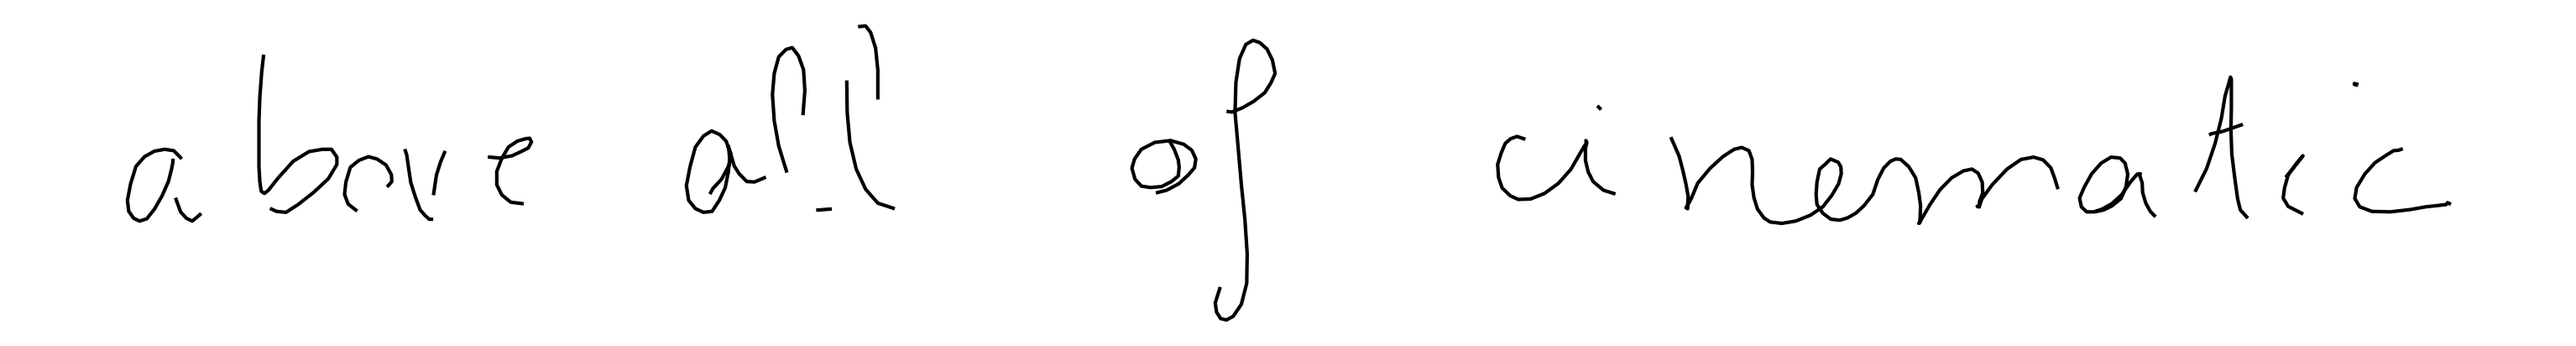

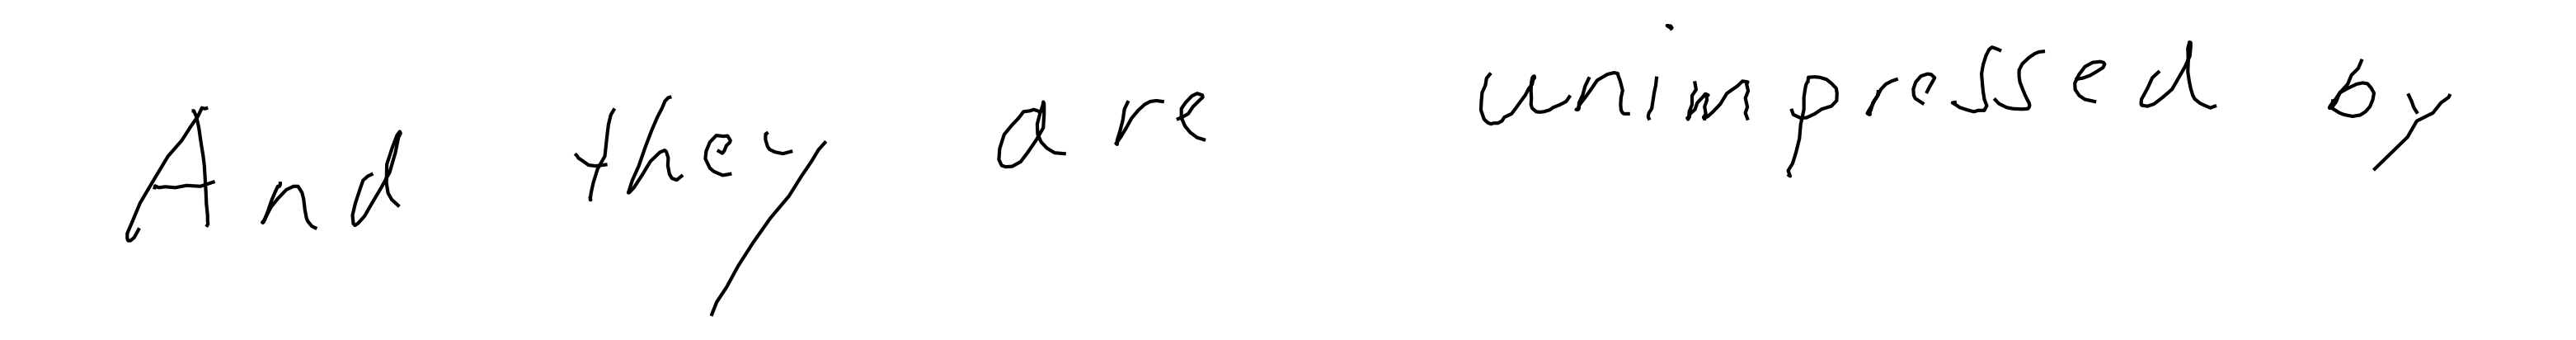

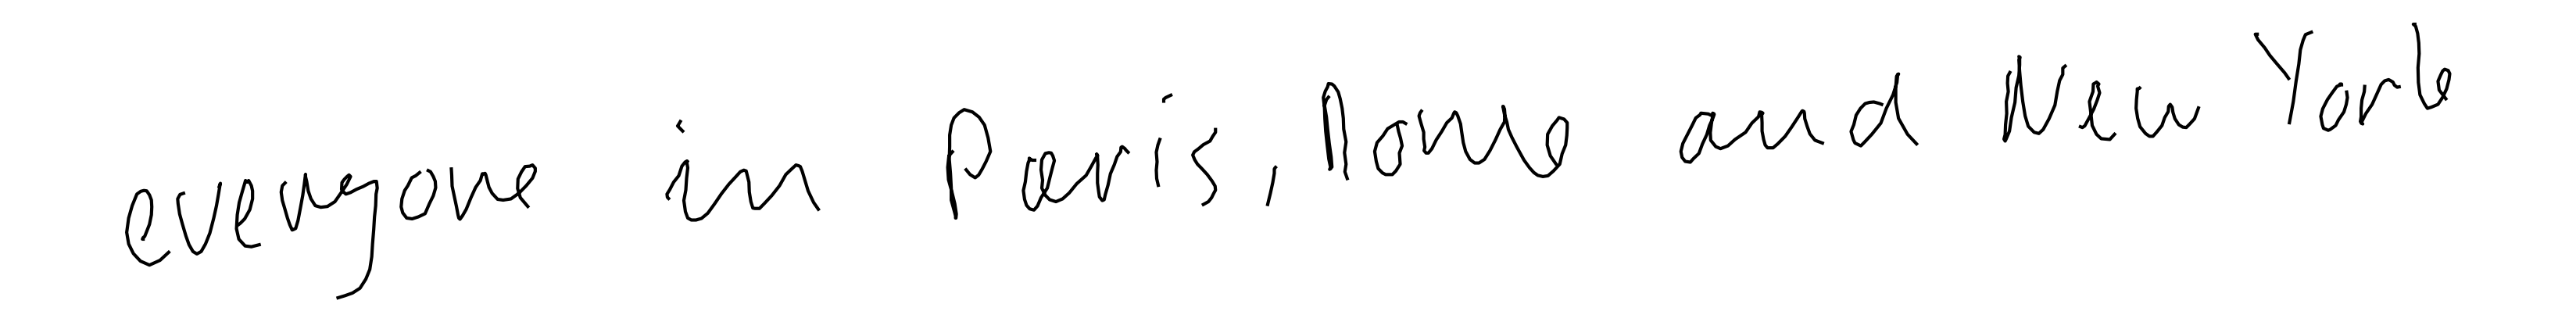

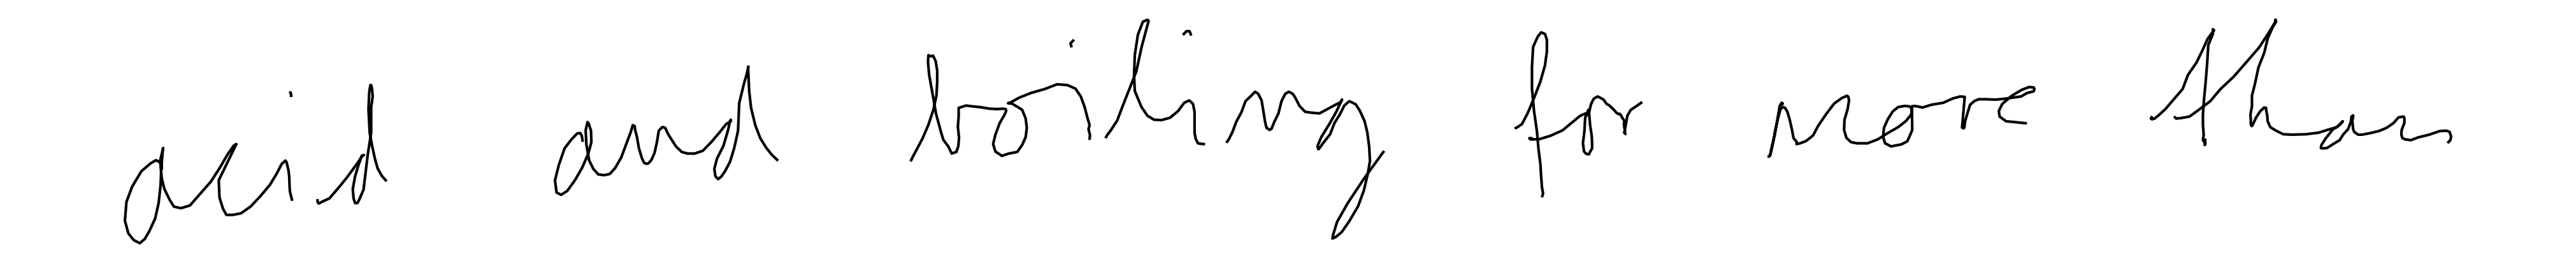

In [38]:
print(len(strokes))
index = np.random.randint(0, len(strokes), 10)
print(index)
for i in index:
    plot_stroke(strokes[i])

In [39]:
index[6]

3281

In [40]:
index[2]

5599